## Python imports.

In [34]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import collections as matcoll

## Data gathering and cleaning.

In [35]:
DATA_FOLDER = './data/example_sales.csv'

In [36]:
data = pd.read_csv(DATA_FOLDER) # read the data.

In [37]:
data.head(2)

,year,month,month_name,sales
0,2021,1,jan,4467
1,2021,2,feb,3497


In [38]:
data.tail(2)

,year,month,month_name,sales
22,2022,11,nov,4166
23,2022,12,dec,3204


In [39]:
current_year = 2022
previous_year = current_year -1

## Plotting the data.

#### Matplotlib default.

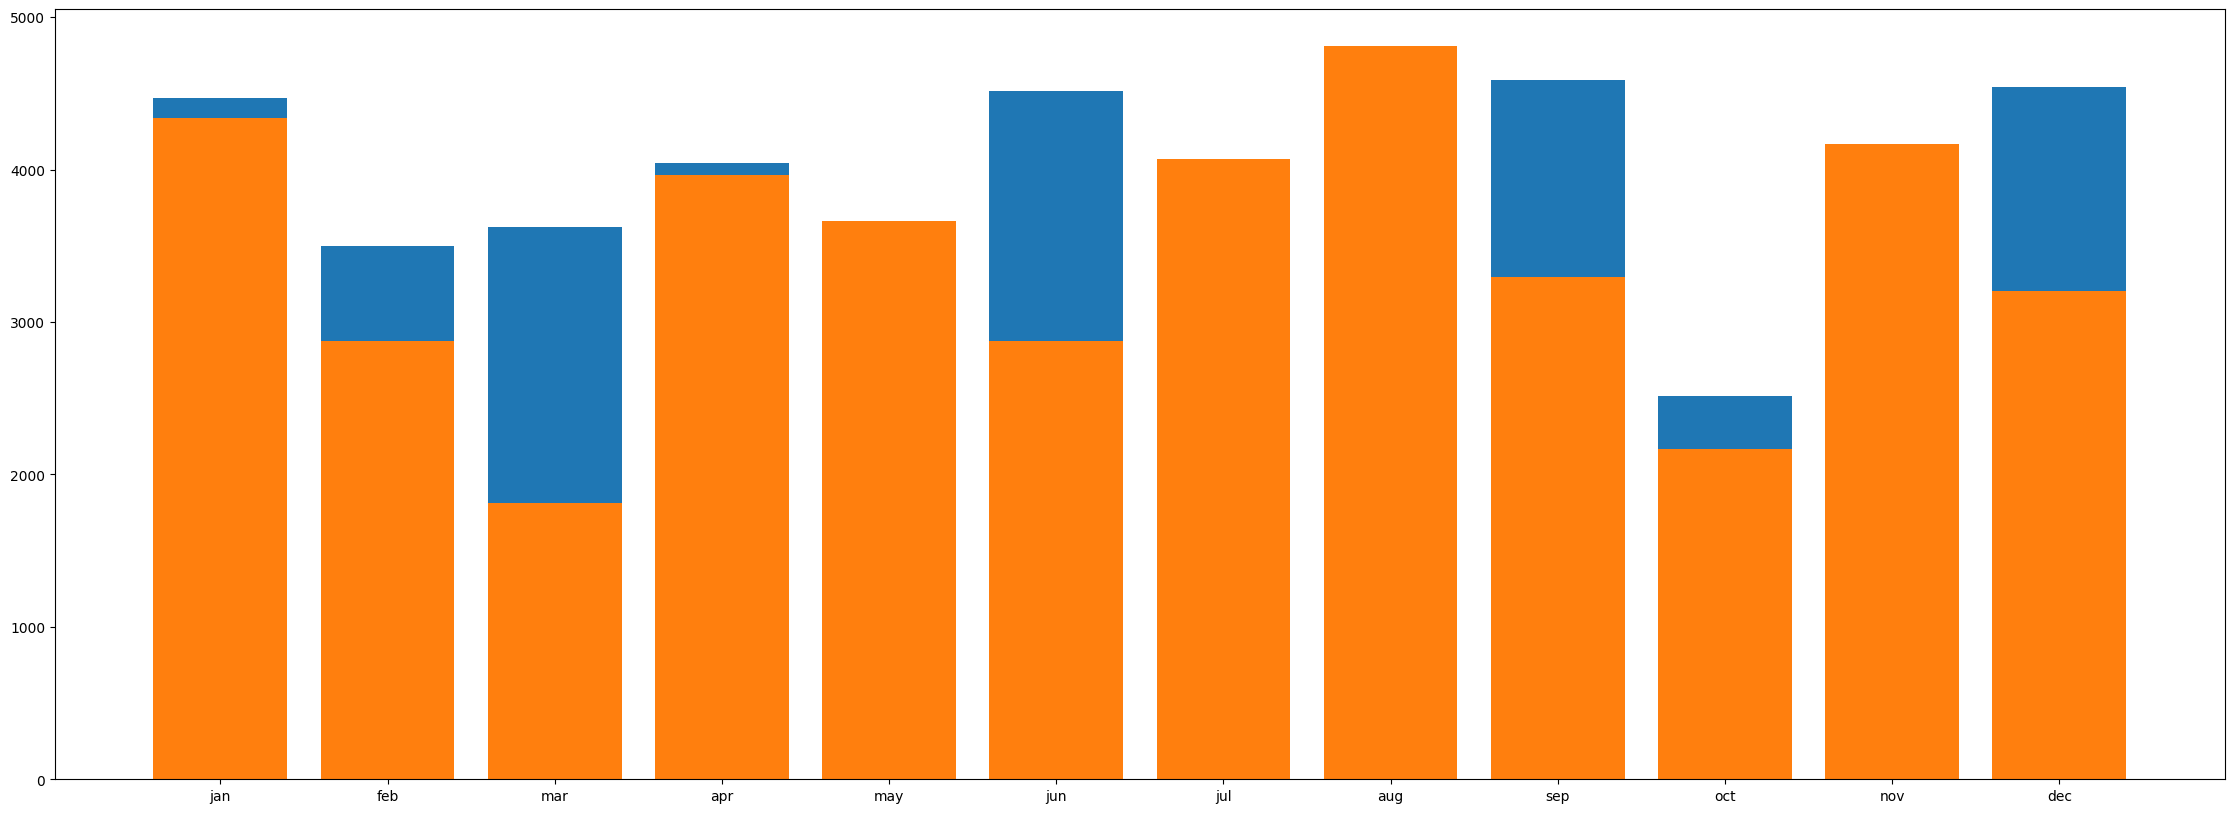

In [40]:
fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.bar(data[data.year == previous_year].month_name, data[data.year == previous_year].sales)
ax.bar(data[data.year == current_year].month_name, data[data.year == current_year].sales)

# show plot.
plt.show()

# plt.savefig('../img/bar-plot-before.png', dpi = 300, bbox_inches = 'tight')

#### Final Plot.

In [41]:
# Lets define a custom function for coloring text in matplotlib.
# NOTE: this is a workaround since Latex was not available in the system.

def color_title(title, colors, x, y, size, ax = None):
  """Creates custom titles with color"""

  if ax == None:
    ax = plt.gca()

  # initial params
  plt.gcf().canvas.draw()
  transform = ax.transAxes 

  x_position = x
  y_position = y

  for text, color in zip(title, colors):
    title = ax.text(x_position, y_position, text, transform = transform, color = color, size = size)

    bbox = title.get_window_extent().transformed(transform.inverted())
    x_position = bbox.x1

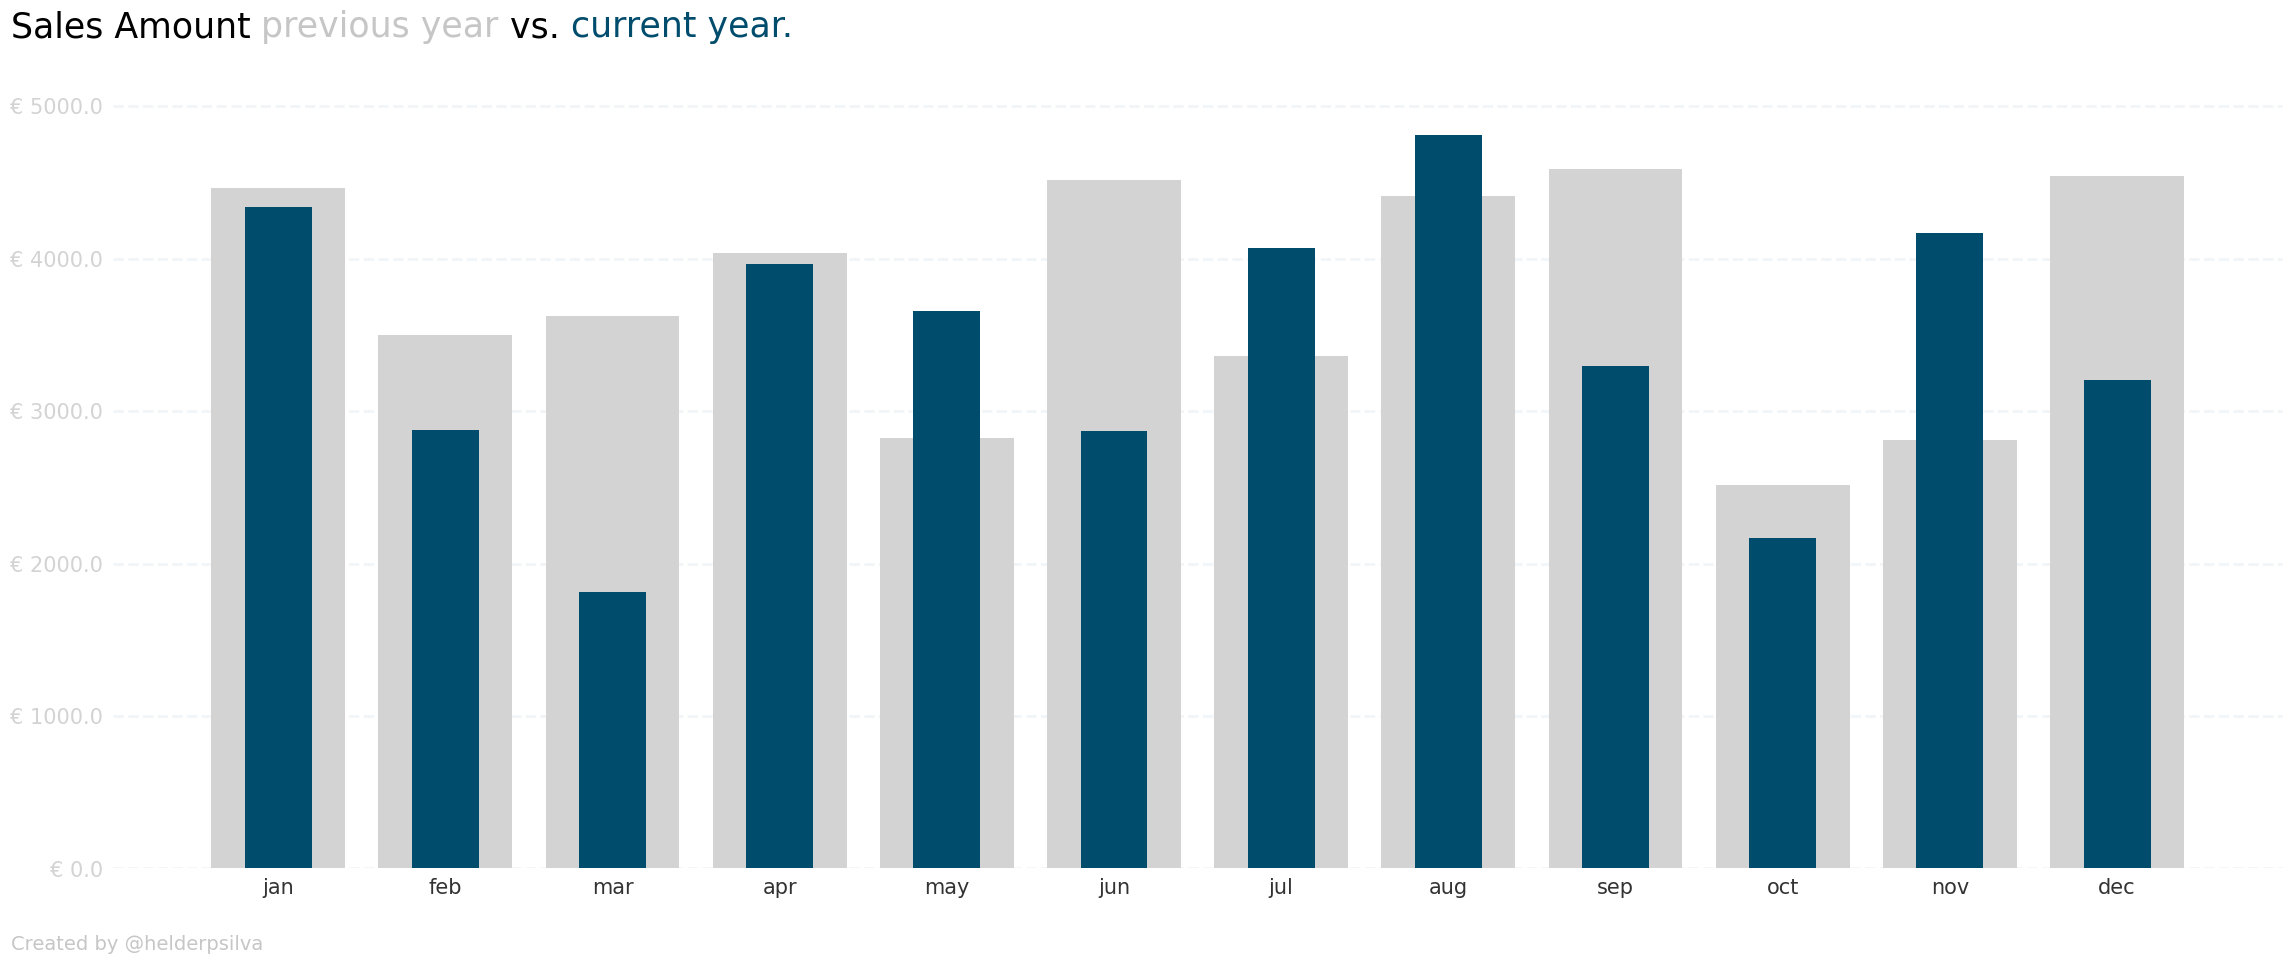

In [42]:
# colors.
blue_color = '#004c6d'
gray_color = '#c6c6c6'
lightgray_color = 'lightgray'
darkgray_color = '#333333'

fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.bar(data[data.year == previous_year].month_name, data[data.year == previous_year].sales, label='PY Sales', color = lightgray_color)
ax.bar(data[data.year == current_year].month_name, data[data.year == current_year].sales, label='Sales', color = blue_color, width=0.40)

# remove axis spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove tick marks.
ax.tick_params( bottom=False, left=False)

# change tick size.
plt.xticks(fontsize=15, color = darkgray_color) # x axis
plt.yticks(fontsize=15, color = lightgray_color) # y axis

# add custom tick units.
ax.yaxis.set_major_formatter('€ {x:1.1f}')

# add horizontal grid.
ax.set_axisbelow(True)
ax.yaxis.grid(color = blue_color, linestyle='dashed', linewidth=2, alpha=0.05)

# add title.
title = ['Sales Amount ','previous year',' vs. ', 'current year.' ] # title separated based on the color.
title_color = ['k', gray_color, 'k', blue_color] # list with respective colors.

# custom function for coloring text. (see cell above)
color_title(title, title_color, -0.047,1.08,25,ax)

# add source and author.
plt.text(-1.6, -535, "Created by @helderpsilva", fontsize=14, color = gray_color)

# show plot.
plt.show()

# plt.savefig('../img/bar-plot-after.png', dpi = 300, bbox_inches = 'tight')